In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('/kaggle/input/imdb-india-movies/IMDb Movies India.csv',encoding='latin-1')

EDA

In [3]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [5]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [6]:
df.shape

(15509, 10)

In [7]:
df.nunique

<bound method DataFrame.nunique of                                      Name    Year Duration            Genre  \
0                                             NaN      NaN            Drama   
1      #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                             #Homecoming  (2021)   90 min   Drama, Musical   
3                                 #Yaaram  (2019)  110 min  Comedy, Romance   
4                       ...And Once Again  (2010)  105 min            Drama   
...                                   ...     ...      ...              ...   
15504                 Zulm Ko Jala Doonga  (1988)      NaN           Action   
15505                               Zulmi  (1999)  129 min    Action, Drama   
15506                           Zulmi Raj  (2005)      NaN           Action   
15507                       Zulmi Shikari  (1988)      NaN           Action   
15508                        Zulm-O-Sitam  (1998)  130 min    Action, Drama   

       Rating Vo

In [8]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [9]:
df.isnull().any()

Name        False
Year         True
Duration     True
Genre        True
Rating       True
Votes        True
Director     True
Actor 1      True
Actor 2      True
Actor 3      True
dtype: bool

In [10]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [11]:
#We are changing the datatype for column 'Duration'
df['Duration']= df['Duration'].str.replace('min','').apply(pd.to_numeric)

#changing datatype with some string replacing
df["Votes"]=df["Votes"].replace("$5.16M", 516)
df["Votes"] = pd.to_numeric(df['Votes'].str.replace(',',''))

In [12]:
df['Duration'].unique()

array([ nan, 109.,  90., 110., 105., 147., 142.,  59.,  82., 116.,  96.,
       120., 161., 166., 102.,  87., 132.,  66., 146., 112., 168., 158.,
       126.,  94., 138., 124., 144., 157., 136., 107., 113.,  80., 122.,
       149., 148., 130., 121., 188., 115., 103., 114., 170., 100.,  99.,
       140., 128.,  93., 125., 145.,  75., 111., 134.,  85., 104.,  92.,
       137., 127., 150., 119., 135.,  86.,  76.,  70.,  72., 151.,  95.,
        52.,  89., 143., 177., 117., 123., 154.,  88., 175., 153.,  78.,
       139., 133., 101., 180.,  60.,  46., 164., 162., 171., 160., 152.,
        62., 163., 165., 141., 210., 129., 156., 240., 172., 155., 118.,
       167., 106., 193.,  57., 108.,  45., 195., 174.,  81., 178.,  58.,
       184.,  97.,  98., 131., 176., 169.,  77.,  91.,  84., 173.,  74.,
        67., 181., 300.,  79.,  65.,  48., 183., 159.,  83.,  68.,  49.,
       201.,  64., 186.,  50.,  69., 207.,  55.,  61., 185., 187., 216.,
        63.,  54., 198.,  51.,  71.,  73., 218., 19

In [13]:
df.groupby(['Genre']).count()

,Name,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
Genre,,,,,,,,,
Action,1289,1265,262,417,417,1249,1207,1124,1005
"Action, Adventure",41,41,17,24,24,41,40,39,39
"Action, Adventure, Biography",1,1,1,1,1,1,1,1,1
"Action, Adventure, Comedy",42,41,37,40,40,42,42,42,42
"Action, Adventure, Crime",19,19,11,16,16,19,19,19,19
...,...,...,...,...,...,...,...,...,...
"Thriller, Action",2,2,1,1,1,2,2,2,2
"Thriller, Musical, Mystery",1,1,1,1,1,1,1,1,1
"Thriller, Mystery",3,3,2,3,3,3,3,3,3


In [14]:
df["Director"].value_counts().head(6)

Director
Jayant Desai       58
Kanti Shah         57
Babubhai Mistry    50
Mahesh Bhatt       48
Master Bhagwan     47
Nanabhai Bhatt     46
Name: count, dtype: int64

Plots and Visualizations

In [77]:
def TopTenPlot(column):
    global df
    df[column].value_counts().sort_values(ascending=False)[:10].plot(kind="bar", figsize=(20,6), edgecolor="k")
    plt.xticks(rotation=0)
    plt.title("Top Ten {}".format(column))
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

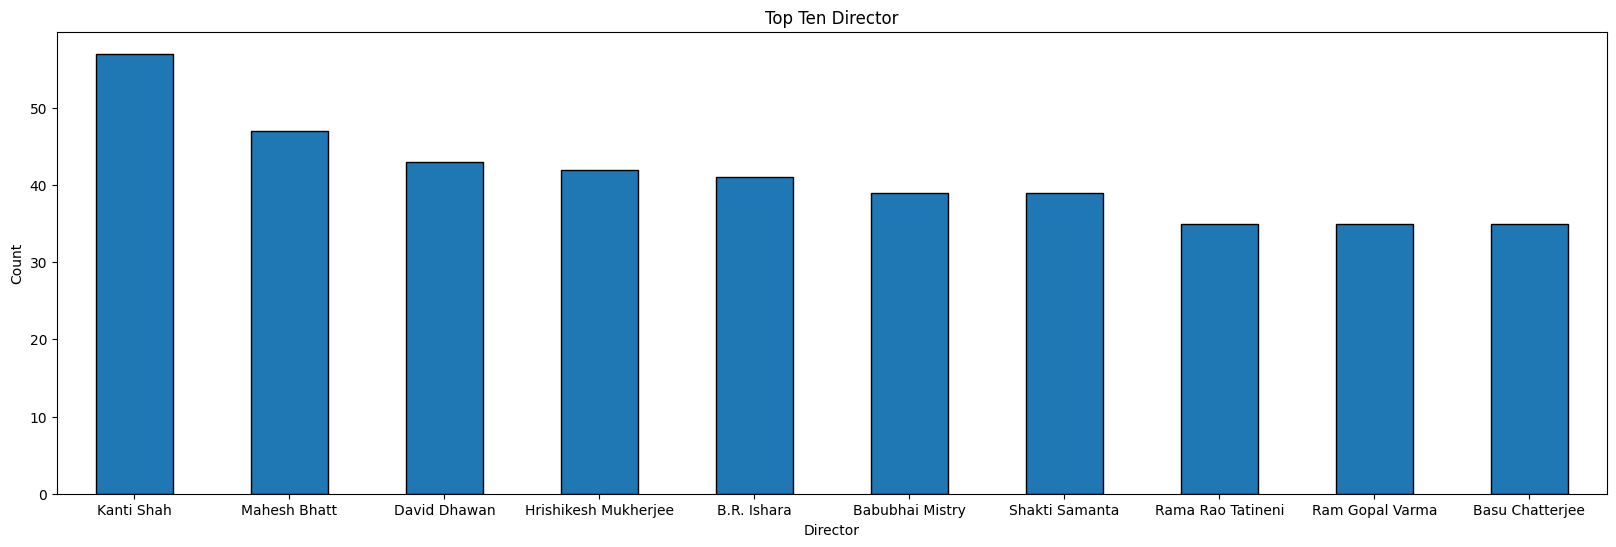

In [78]:
TopTenPlot("Director")

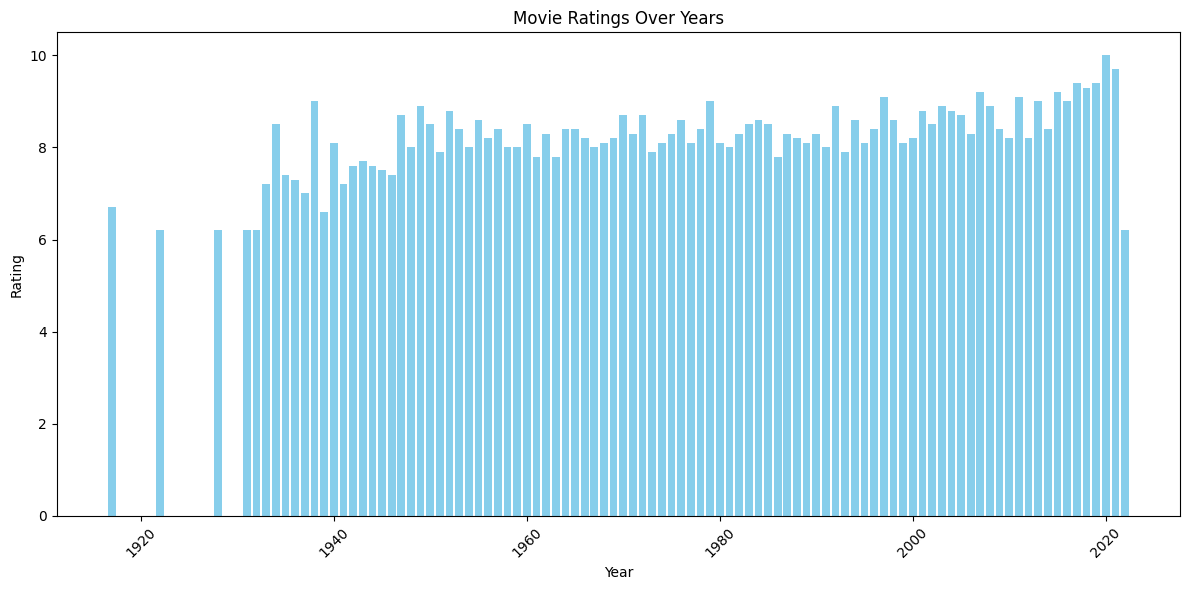

In [79]:
import matplotlib.pyplot as plt


years = df['Year']
ratings = df['Rating']

plt.figure(figsize=(12, 6))
plt.bar(years, ratings, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.title('Movie Ratings Over Years')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


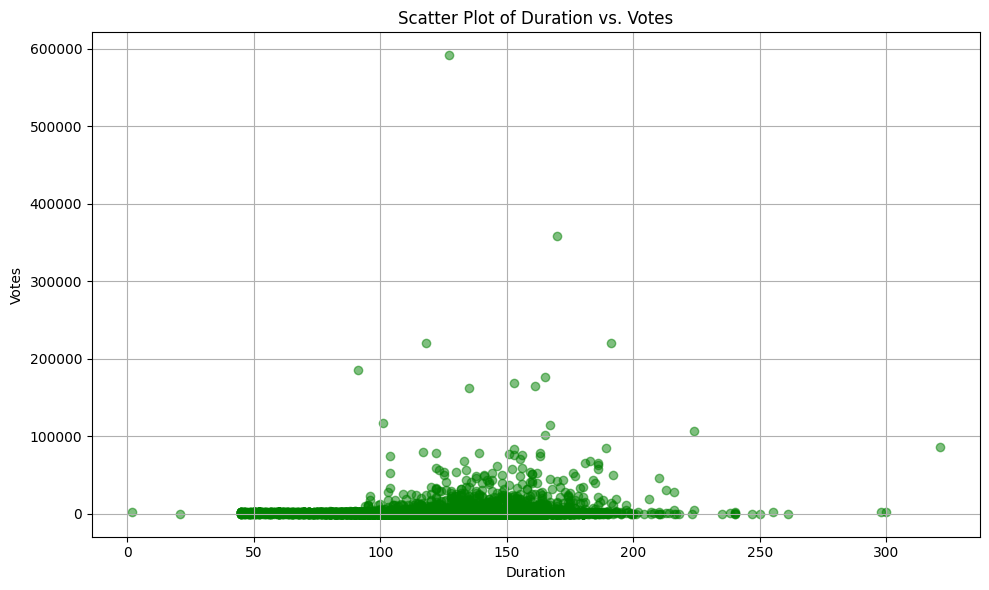

In [80]:

durations = df['Duration']
votes = df['Votes']

plt.figure(figsize=(10, 6))
plt.scatter(durations, votes, alpha=0.5, color='green')
plt.xlabel('Duration')
plt.ylabel('Votes')
plt.title('Scatter Plot of Duration vs. Votes')
plt.grid(True)
plt.tight_layout()
plt.show()


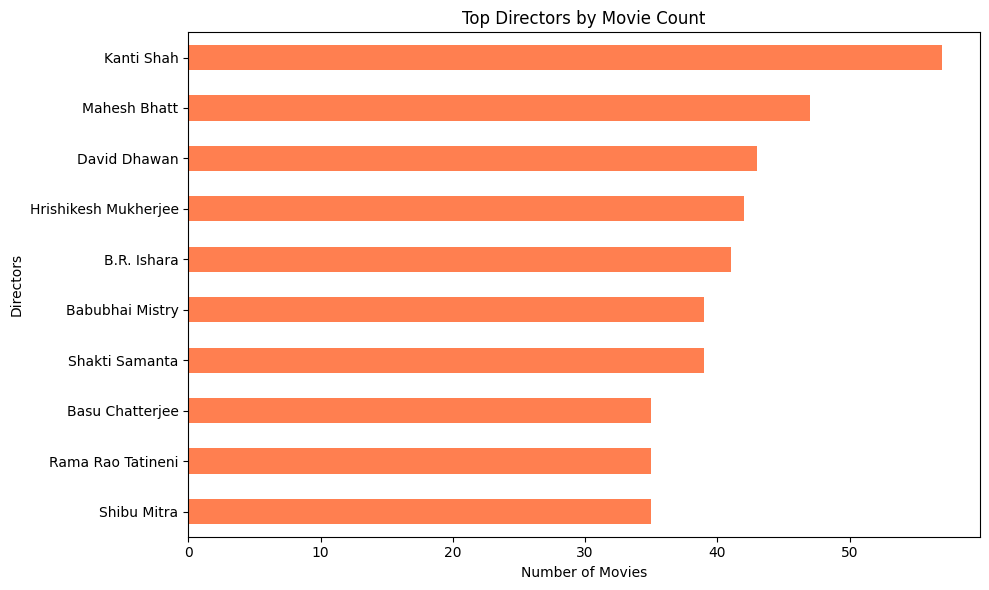

In [81]:

top_directors = df['Director'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_directors.plot(kind='barh', color='coral')
plt.xlabel('Number of Movies')
plt.ylabel('Directors')
plt.title('Top Directors by Movie Count')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


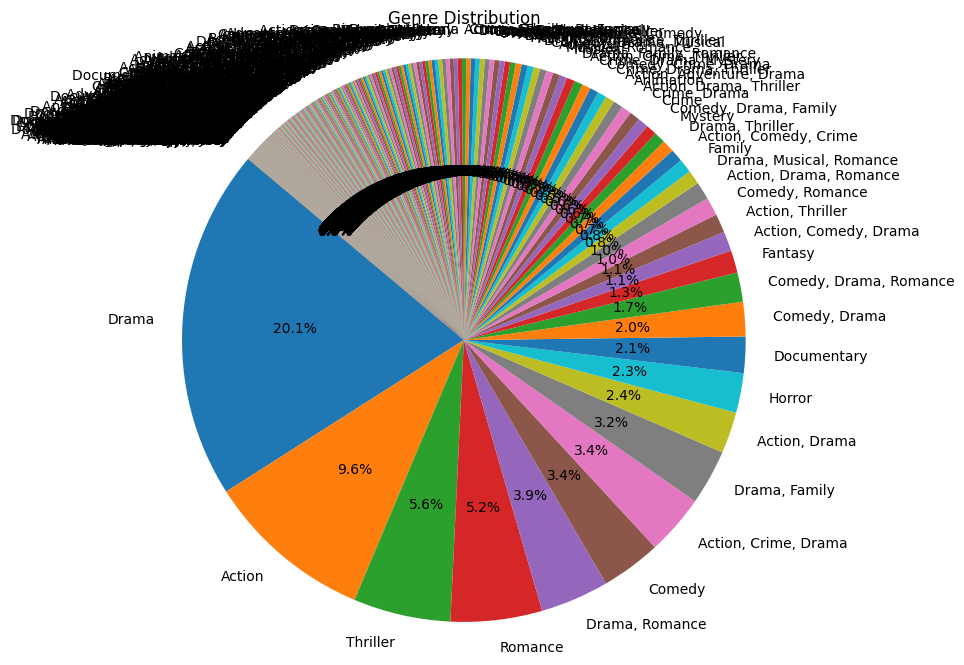

In [82]:

genre_counts = df['Genre'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Genre Distribution')
plt.axis('equal')
plt.show()


In [15]:
#printing Total null Values for the column Year and Genre
print('Null Values in Year Column',df['Year'].isnull().sum())
print('Null Values in Genre Column',df['Genre'].isnull().sum())

Null Values in Year Column 528
Null Values in Genre Column 1877


In [16]:
#Dropping null values
df.dropna(subset=['Year'],inplace=True)
df.dropna(subset=['Genre'],inplace=True)

#Checking Null Values again for confirmation. you can also skip the unnessasary stpes here and in above cell
print('Null Values in Year Column',df['Year'].isnull().sum())
print('Null Values in Genre Column',df['Genre'].isnull().sum())

Null Values in Year Column 0
Null Values in Genre Column 0


In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
#replacing null values with the most common rating given to an Indian Movie
df['Rating'].fillna(df['Rating'].mode().max(),inplace=True)

#replacing null values with average duration of a movie in India
df['Duration'].fillna(df['Duration'].mean(),inplace=True)

#replacing null values with average votes recived by a Movie
df['Votes'].fillna(df['Votes'].mean(),inplace=True)

In [19]:
df.isnull().any()

Name        False
Year        False
Duration    False
Genre       False
Rating      False
Votes       False
Director     True
Actor 1      True
Actor 2      True
Actor 3      True
dtype: bool

In [20]:
df.duplicated().sum()

4

In [21]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109.0,Drama,7.0,8.000000,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90.0,"Drama, Musical",6.2,1963.643981,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110.0,"Comedy, Romance",4.4,35.000000,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105.0,Drama,6.2,1963.643981,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147.0,"Comedy, Drama, Musical",4.7,827.000000,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor


In [24]:
df['Year'] = df['Year'].str.replace(r'\D+', '', regex=True)

# Convert cleaned 'Year' column to integers
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

In [25]:
X = df[['Year', 'Duration', 'Votes']]  # Example: Selecting numeric features
y = df['Rating']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
from sklearn.model_selection import cross_val_score, KFold

In [68]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)


Linear Regrssion

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [28]:
model_lr = LinearRegression()

In [29]:
model_lr.fit(X_train, y_train)

LinearRegression()

In [31]:
# Predict ratings on the test set
y_pred = model_lr.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

In [32]:
mse

1.0407535908559866

Decision tree

In [35]:
from sklearn.tree import DecisionTreeRegressor

In [36]:
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [39]:
y_pred_dt = model_dt.predict(X_test)

In [40]:
mse_dt = mean_squared_error(y_test, y_pred_dt)

In [41]:
mse_dt

1.5482874247701364

RF

In [43]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [45]:
y_pred_rf = model_rf.predict(X_test)

In [46]:
mse_rf = mean_squared_error(y_test, y_pred_rf)

In [47]:
mse_rf

0.874361511711674

Gradient Boosting

In [48]:
from sklearn.ensemble import GradientBoostingRegressor

In [49]:
model_gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model_gb.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [50]:
y_pred_gb = model_gb.predict(X_test)

In [51]:
mse_gb = mean_squared_error(y_test, y_pred_gb)

In [52]:
mse_gb

0.7726064633795985

XG Boost

In [53]:
from xgboost import XGBRegressor

In [57]:
model_xgb = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, random_state=42)
model_xgb.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [58]:
y_pred_xgb = model_xgb.predict(X_test)

In [59]:
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

In [60]:
mse_xgb

0.7824666436294657

Light GBM

In [61]:
import lightgbm as lgb

In [62]:
model_lgb = lgb.LGBMRegressor(num_leaves=31, learning_rate=0.05, n_estimators=100)
model_lgb.fit(X_train, y_train)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001775 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 10512, number of used features: 3
[LightGBM] [Info] Start training from score 5.984846


LGBMRegressor(learning_rate=0.05)

In [63]:
y_pred_lgb = model_lgb.predict(X_test)

In [64]:
mse_lgb = mean_squared_error(y_test, y_pred)

In [65]:
mse_lgb

1.5482874247701364

Conclusion 

In [69]:
from tabulate import tabulate

In [70]:
data = [
    ['Linear Regression', 1.0407],
    ['Decision Tree',1.548],
    ['Random Forest', 0.847],
    ['XGBoost', 0.782],
    ['Gradient Boost',0.772],
    ['Light GBM',1.548]
]

# Create a table using tabulate
table = tabulate(data, headers=['Model', 'MSE'], tablefmt='grid')

# Print the table
print(table)

+-------------------+--------+
| Model             |    MSE |
+===================+========+
| Linear Regression | 1.0407 |
+-------------------+--------+
| Decision Tree     | 1.548  |
+-------------------+--------+
| Random Forest     | 0.847  |
+-------------------+--------+
| XGBoost           | 0.782  |
+-------------------+--------+
| Gradient Boost    | 0.772  |
+-------------------+--------+
| Light GBM         | 1.548  |
+-------------------+--------+


Prompt

In [76]:
def predict_rating():
    year = int(input("Enter the year of the movie: "))
    duration = int(input("Enter the duration of the movie (in minutes): "))
    votes = int(input("Enter the number of votes received by the movie: "))
 
    input_data = pd.DataFrame([[year, duration, votes]], columns=['Year', 'Duration', 'Votes'])
   
    # Predict the rating
    predicted_rating = model_lgb.predict(input_data)
    
    print(f"Predicted rating for the movie: {predicted_rating[0]:.2f}")

# Example usage
predict_rating()

Enter the year of the movie:  2009
Enter the duration of the movie (in minutes):  120
Enter the number of votes received by the movie:  0


Predicted rating for the movie: 5.10
